<a href="https://colab.research.google.com/github/narayananv10/DeepLearning/blob/master/J054_Lab7B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#How to get Images from ImageNet with Python in Google Colaboratory

The first step to train a model for image recognition is finding images that belong to the desired class (or classes), and ImageNet is very useful for this because it currently has 14,197,122 images with 21841 synsets indexed. ImageNet aims to provide on average 1000 images to illustrate each one of their 100,000 synsets, the majority of the synsets are nouns (80.000+).

For instance if the synset needed is pictures of ships it can be found by searching for ship on the imagenet website and the result will be the following page which has the wnid: n04194289

#Get the list of URLs for the images of the synset:

Said list of URLs can be downloaded from the URL http://www.image-net.org/api/text/imagenet.synset.geturls?wnid= followed by the wnid so in the case of ships it would be â€œhttp://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04194289" this can be done with the Python library BeautifulSoup:

In [1]:
#code part 1
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib
import os
import pandas as pd

page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04194289")#ship synset
print(page.content)

# BeautifulSoup is an HTML parsing library/

soup = BeautifulSoup(page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line
#print(soup)
#print(soup.prettify())

b"http://static.flickr.com/85/233578996_8f74463083.jpg\r\nhttp://farm3.static.flickr.com/2317/2472759369_f4cc1ff8a0.jpg\r\nhttp://static.flickr.com/2173/2071797511_200e3e4d2e.jpg\r\nhttp://farm2.static.flickr.com/1019/534041866_3aa182311c.jpg\r\nhttp://static.flickr.com/88/231940102_7beb5ecf3e.jpg\r\nhttp://farm4.static.flickr.com/3138/2724596903_d74dd64821.jpg\r\nhttp://static.flickr.com/174/453920264_9406e9972c.jpg\r\nhttp://farm2.static.flickr.com/1419/1408865234_caf87d02e3.jpg\r\nhttp://farm1.static.flickr.com/147/423542865_c091691a6b.jpg\r\nhttp://farm3.static.flickr.com/2074/2367492616_272bf6af6a.jpg\r\nhttp://farm2.static.flickr.com/1081/1365111200_8d105d9fb1.jpg\r\nhttp://farm3.static.flickr.com/2269/2348294071_94fc609f4a.jpg\r\nhttp://static.flickr.com/1016/1443997081_b5eb875055.jpg\r\nhttp://www.walleniuslines.com/img_upload/maersk_teal.jpg\r\nhttp://www.fondear.org/infonautic/Barco/Barco_Navegando/Contenedores_Peligro/sea_container_ship2.jpg\r\nhttp://static.flickr.com/198/4

In [2]:
#code part 1.1
bikes_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02834778")#bicycle synset
print(bikes_page.content)

# BeautifulSoup is an HTML parsing library
from bs4 import BeautifulSoup
bikes_soup = BeautifulSoup(bikes_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

b"http://farm2.static.flickr.com/1089/537335018_9813e94757.jpg\r\nhttp://members.lycos.nl/zwawe/hpbimg/fiets3.jpg\r\nhttp://communities.canada.com/shareit/photos/bicycles/images/64838/425x286.aspx\r\nhttp://farm2.static.flickr.com/1090/1441125154_341230126c.jpg\r\nhttp://farm4.static.flickr.com/3219/2681908945_dbe4c38deb.jpg\r\nhttp://farm3.static.flickr.com/2186/2358375851_fa98bf5314.jpg\r\nhttp://farm3.static.flickr.com/2375/2463989860_28a9d6743c.jpg\r\nhttp://bluh.nl/images/portfolio/grafisch/fiets.jpg\r\nhttp://www.bakkeveen.nl/Ondernemers/Bolhuis/2003_3_22_A.jpg\r\nhttp://upload.wikimedia.org/wikipedia/commons/a/a1/A_Bicycle_in_Oxford.JPG\r\nhttp://farm1.static.flickr.com/220/503379999_8301b3ed00.jpg\r\nhttp://farm3.static.flickr.com/2266/2539943000_005b996b1e.jpg\r\nhttp://home.kooee.com.au/nobananas/images/clayton-bike-1.jpg\r\nhttp://farm1.static.flickr.com/21/26188741_0a4a18d992.jpg\r\nhttp://farm3.static.flickr.com/2085/1642604624_4ca84a32c4.jpg\r\nhttp://www.bikeracks.us/ima

In [3]:
#code part 2
str_soup=str(soup)#convert soup to string so it can be split
type(str_soup)
split_urls=str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(split_urls))#print the length of the list so you know how many urls you have

#code part 2.2
bikes_str_soup=str(bikes_soup)#convert soup to string so it can be split
type(bikes_str_soup)
bikes_split_urls=bikes_str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(bikes_split_urls))

1262
1345


#Make folders


![alt text](http://upscfever.com/datasets/flow_from_directory.jpeg)

In [0]:
#code part 3
#check if all the images where stored on the files system
!mkdir /content/train #create the Train folder
!mkdir /content/train/ships #create the ships folder
!mkdir /content/train/bikes #create the bikes folder
!mkdir /content/validation
!mkdir /content/validation/ships #create the ships folder
!mkdir /content/validation/bikes #create the bikes folder
#!ls /content/train/ships #list the files inside ships
!mkdir /content/test/ 
!mkdir /content/test/test #list the files inside test

In [5]:
#code part 4
img_rows, img_cols = 32, 32 #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)#format to store the images (rows, columns,channels) called channels last

def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

n_of_training_images=150#the number of training images to use
for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not split_urls[progress] == None:
      try:
        I = url_to_image(split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/train/ships/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

#do the same for bikes:
for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not bikes_split_urls[progress] == None:
      try:
        I = url_to_image(bikes_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/train/bikes/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None
        
        
#Validation data:

for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not split_urls[progress] == None:
      try:
        I = url_to_image(split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/validation/ships/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

#do the same for bikes:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not bikes_split_urls[progress] == None:
      try:
        I = url_to_image(bikes_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/validation/bikes/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None
        
print("\nTRAIN:\n")          
print("\nlist the files inside ships directory:\n")        
!ls /content/train/ships #list the files inside ships
print("\nlist the files inside bikes directory:\n")
!ls /content/train/bikes #list the files inside bikes
print("\nVALIDATION:\n")
print("\nlist the files inside ships directory:\n")        
!ls /content/validation/ships #list the files inside ships
print("\nlist the files inside bikes directory:\n")
!ls /content/validation/bikes #list the files inside bikes   

0
20
40
60
80
100
120
140
0
20
40
60
80
100
120
140
0
20
40
0
20
40

TRAIN:


list the files inside ships directory:

img0.jpg    img122.jpg	img141.jpg  img24.jpg  img46.jpg  img63.jpg  img8.jpg
img102.jpg  img125.jpg	img142.jpg  img25.jpg  img47.jpg  img64.jpg  img91.jpg
img103.jpg  img127.jpg	img143.jpg  img26.jpg  img48.jpg  img66.jpg  img92.jpg
img105.jpg  img12.jpg	img144.jpg  img28.jpg  img49.jpg  img67.jpg  img93.jpg
img107.jpg  img130.jpg	img146.jpg  img29.jpg  img4.jpg   img69.jpg  img94.jpg
img108.jpg  img131.jpg	img147.jpg  img31.jpg  img51.jpg  img6.jpg   img95.jpg
img111.jpg  img132.jpg	img148.jpg  img32.jpg  img52.jpg  img72.jpg  img96.jpg
img113.jpg  img133.jpg	img149.jpg  img33.jpg  img54.jpg  img73.jpg  img97.jpg
img115.jpg  img135.jpg	img14.jpg   img34.jpg  img55.jpg  img74.jpg  img99.jpg
img116.jpg  img136.jpg	img15.jpg   img35.jpg  img56.jpg  img76.jpg
img117.jpg  img137.jpg	img16.jpg   img39.jpg  img59.jpg  img77.jpg
img118.jpg  img138.jpg	img17.jpg   img3.jpg   im

In [6]:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not split_urls[progress] == None:
      try:
        I = url_to_image(split_urls[n_of_training_images+progress+50])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/test/test/ships_'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

#do the same for bikes:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not bikes_split_urls[progress] == None:
      try:
        I = url_to_image(bikes_split_urls[n_of_training_images+progress+50])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/test/test/bikes_'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None



0
20
40
0
20
40


In [0]:
# Path to the train folder
original_test = '/content/test/test'
 
filenames = os.listdir(original_test)
categories = []
for filename in filenames:
    category = filename.split('_')[0]
    if category == 'ships':
        categories.append('ships')
    else:
        categories.append('bikes')

data_test = pd.DataFrame({'filename':filenames,'label':categories})

data_test.to_csv("original_test.csv",index=False)

#Data augmentation

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
    directory=r"/content/train/",
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42
)

valid_generator = test_datagen.flow_from_directory(
    directory=r"/content/validation/",
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    directory="/content/test/",
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Using TensorFlow backend.


Found 189 images belonging to 2 classes.
Found 59 images belonging to 2 classes.
Found 58 images belonging to 1 classes.


#Fit the model

In [9]:
from keras.utils.np_utils import to_categorical
from keras import models
from keras.datasets import cifar10
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.preprocessing.image import ImageDataGenerator

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size



model = Sequential()
#We need to use a Conv2D layer at start of the neural network 
#the syntax is Conv2D(1, (image_width,image_height), padding="valid", activation="relu", input_shape=X_train.shape[1:])
#the we add a flatten layer
model.add(Conv2D(512, (32, 32), padding="valid", activation="relu", input_shape=(32, 32, 3)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])


model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





5/5 [==============================] - 14s 3s/step - loss: 1.6092 - acc: 0.5353 - val_loss: 1.0962 - val_acc: 0.6250
Epoch 2/10
5/5 [==============================] - 1s 132ms/step - loss: 0.9145 - acc: 0.5206 - val_loss: 0.5132 - val_acc: 0.8148
Epoch 3/10
5/5 [==============================] - 1s 174ms/step - loss: 0.6114 - acc: 0.6688 - val_loss: 0.4726 - val_acc: 0.8750
Epoch 4/10
5/5 [==============================] - 1s 171ms/step - loss: 0.5611 - acc: 0.7324 - val_loss: 0.3829 - val_acc: 0.9630
Epoch 5/10
5/5 [==============================] - 1s 160ms/step - loss: 0.6792 - acc: 0.6978 - val_loss: 0.4676 - val_acc: 0.7500
Epoch 6/10
5/5 [==============================] - 1s 164ms/step - loss: 0.5901 - acc: 0.6937 - val_loss: 0.4561 - val_acc: 0.8519
Epoch 7/10
5/5 [==============================] - 1s 171ms/step - loss: 0.5696 - acc: 0.6890 - val_loss: 0.4197 - v

#Evaluate the model

In [10]:
model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID)

[0.36212843656539917, 0.90625]

#Measure the performance on validation set

In [11]:
from sklearn.metrics import roc_auc_score

# AUC for prediction on validation sample
X_val_sample, val_labels = next(valid_generator)
val_pred = model.predict_proba(X_val_sample)
val_pred = np.reshape(val_pred, val_labels.shape)
val_score_auc = roc_auc_score(val_labels, val_pred)
print ("AUC validation score")
print (val_score_auc)
print ('\n')

AUC validation score
0.8787878787878788




#Predict the output

In [12]:
import pandas as pd

STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)


predicted_class_indices = []
for i in pred:
    if i >=0.5:
        predicted_class_indices.append(1)
    else:
        predicted_class_indices.append(0)


labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

58/58 [==============================] - 0s 5ms/step


#Confusion matrix

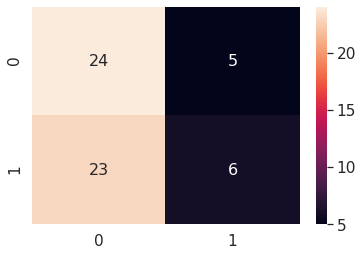

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm=confusion_matrix(data_test['label'],results['Predictions'])

sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()


#Thank you for completing the notebook